In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
ids = test['id']
df = pd.concat([train, test])

In [5]:
df = df.drop(columns = ['id'])

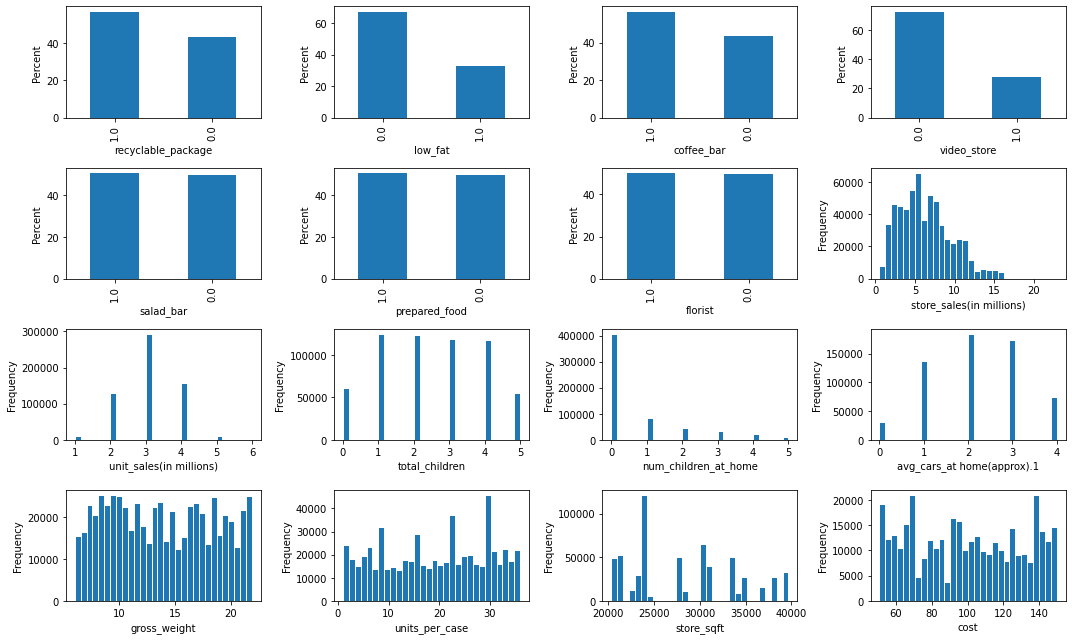

In [14]:
categorical = ['recyclable_package', 'low_fat', 'coffee_bar', 'video_store', 'salad_bar', 'prepared_food', 'florist']
numerical = df.drop(columns = categorical).columns

fig, axes = plt.subplots(4, 4, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(categorical):
    (100* df[col].value_counts() / len(df)).plot.bar(ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Percent')
    
for i, col in enumerate(numerical):
    j = i+len(categorical)
    
    df[col].plot.hist(ax = axes[j], bins = 30, edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

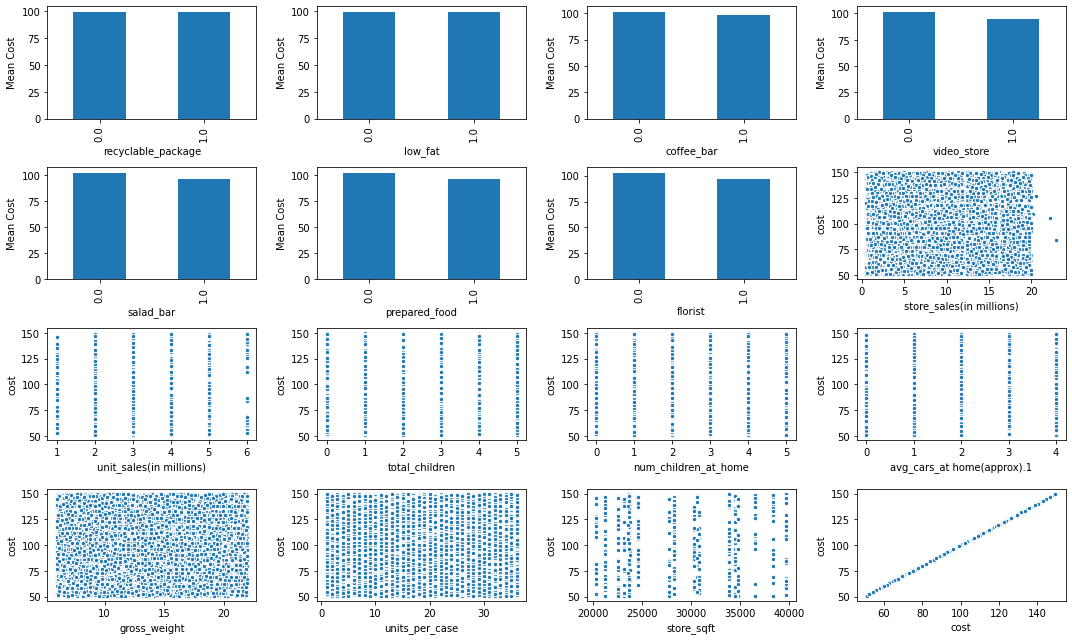

In [16]:
fig, axes = plt.subplots(4, 4, figsize=(15, 9))
axes = axes.flatten()
for i, col in enumerate(categorical):
    df.groupby(col)['cost'].mean().plot.bar(ax = axes[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Mean Cost")
    
for i, col in enumerate(numerical):
    j = i+len(categorical)
    
    df.plot.scatter(x=col, y='cost', ax = axes[j], edgecolor='white')
    axes[j].set_xlabel(col)
    
plt.tight_layout()

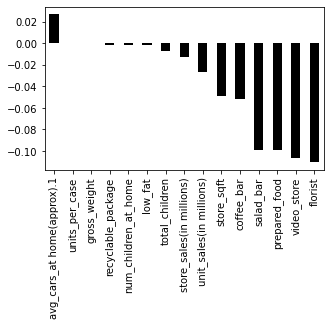

In [19]:
df.corr()['cost'].sort_values(ascending=False)[1:].plot.bar(figsize=(5,3), cmap='copper')
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = df.drop(columns='cost')
y = df['cost']

features = X.columns.values

Scaler = StandardScaler()
Scaler.fit(X)
X = Scaler.transform(X)

X = pd.DataFrame(X, columns = features)

X_test = X[len(train):]
X = X.iloc[:len(train)]
y = y.iloc[:len(train)]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

In [29]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.018983333497528232
Validation score:  0.02066116531228057


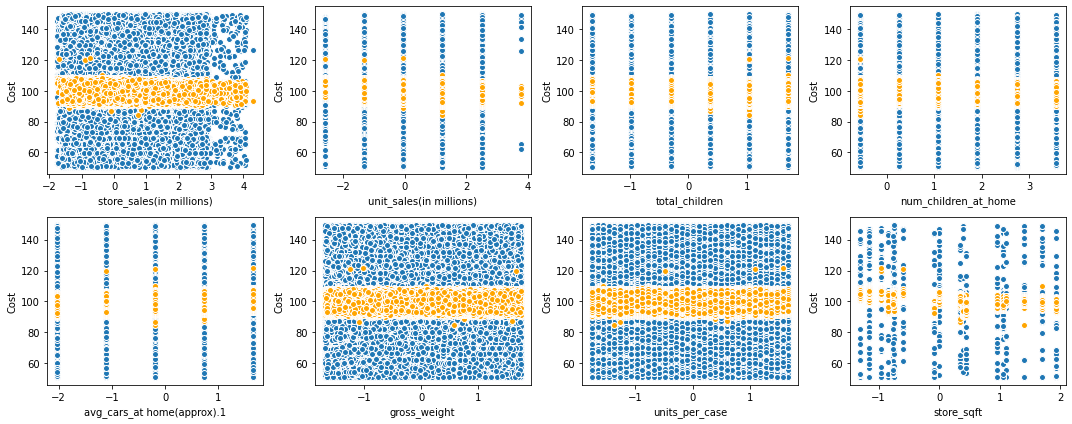

In [30]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(numerical[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Cost")
    
plt.tight_layout()

In [31]:
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

print("Training score: ", model.score(X_train, y_train))
print("Validation score: ", model.score(X_valid, y_valid))

Training score:  0.14265348361815366
Validation score:  0.10678904037717685


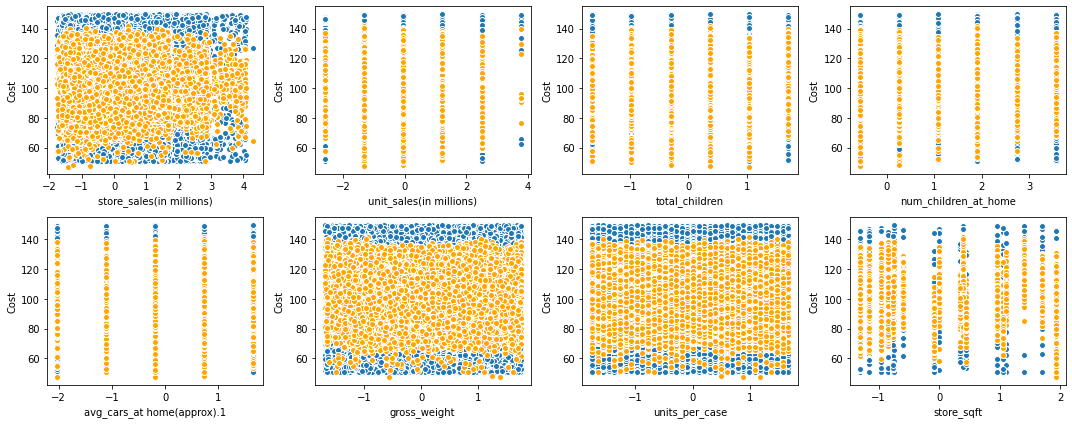

In [32]:
fig, axes = plt.subplots(2, 4, figsize=(15, 6))
axes = axes.flatten()
for j, col in enumerate(numerical[:-1]):
    axes[j].scatter(X_valid[col], y_valid, edgecolor='white')
    axes[j].scatter(X_valid[col], model.predict(X_valid), edgecolor='white', color='orange')
    axes[j].set_xlabel(col)
    axes[j].set_ylabel("Cost")

    
plt.tight_layout()

In [33]:
final_model = XGBRegressor()
model.fit(X, y)
print("Training score: ", model.score(X, y))
y_test_pred = model.predict(X_test)

Training score:  0.1357242161230653


In [34]:
output = pd.DataFrame({'id': ids, 'cost': y_test_pred})

In [35]:
output.to_csv("Submission.csv", index=False)